In [3]:
from astropy.io import fits
import astropy.units as u
from astropy.nddata import CCDData
from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.visualization import ImageNormalize, LogStretch
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import numpy as np
from photutils.background import Background2D, MeanBackground
from photutils import datasets

# Show plots in the notebook
%matplotlib inline

In [4]:
urlB = 'https://www.spacetelescope.org/static/projects/fits_liberator/datasets/m12/Bcomb.zip'
hdu = datasets.load_star_image(urlB)
with fits.open(urlB) as hdulist:
    hdulist.info()
    dataB = hdulist[0].data
    headerB = hdulist[0].header

Filename: /Users/jackroberson/.astropy/cache/download/py3/f88769989cf57ea97741527bcd45a6f6
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (2048, 2048)   float32   


In [5]:
maskB = dataB == 0

In [6]:
unit = u.electron / u.s
IMAGE_B = CCDData(dataB, unit=unit, meta=headerB, mask= maskB)

<Figure size 432x288 with 0 Axes>

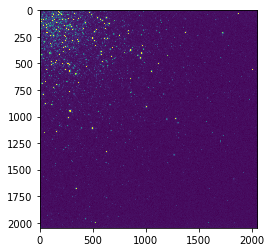

<Figure size 432x288 with 0 Axes>

In [7]:
plt.imshow(dataB, cmap = 'viridis', vmin = 0, vmax = 160)

plt.figure()






In [8]:
urlV = 'https://www.spacetelescope.org/static/projects/fits_liberator/datasets/m12/Vcomb.zip'
hdu = datasets.load_star_image(urlB)
with fits.open(urlV) as hdu:
    hdu.info()
    dataV = hdu[0].data
    headerV = hdu[0].header

Filename: /Users/jackroberson/.astropy/cache/download/py3/2b70d54bc84f57921cca13a2a3a5fcf5
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (2048, 2048)   float32   


In [9]:
maskV = dataV == 0
IMAGE_V = CCDData(dataV, unit=unit, meta=headerV, mask=maskV)

<Figure size 432x288 with 0 Axes>

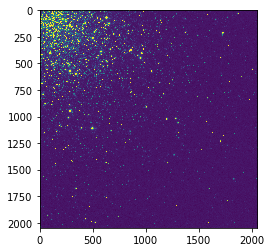

<Figure size 432x288 with 0 Axes>

In [10]:
plt.imshow(dataV, cmap = 'viridis', vmin = 0, vmax = 160)

plt.figure()



In [11]:
from photutils import find_peaks
from photutils.centroids import centroid_2dg
from photutils import DAOStarFinder
import photutils

In [12]:
meanb, medianb, stdb = sigma_clipped_stats(dataB, sigma=3.0, maxiters = 5)
meanv, medianv, stdv = sigma_clipped_stats(dataV, sigma=3.0, maxiters = 5)

In [13]:
print(meanb, medianb, stdb)
print(meanv, medianv, stdv)

5.5414786 5.4666204 1.7091863
9.284391 8.9999895 2.2605705


In [14]:
dao_id_B = DAOStarFinder(fwhm=3.0, threshold = 5.*stdb)
dao_id_V = DAOStarFinder(fwhm=3.0, threshold = 5.*stdv)

In [15]:
sources_B = find_peaks(dataB, mask = maskB, threshold = 15.*stdb, box_size = 30, centroid_func = centroid_2dg)
sources_V = find_peaks(dataV, mask = maskV, threshold = 15.*stdv, box_size = 30, centroid_func = centroid_2dg)

In [16]:
sources_B
#sources_V

x_peak,y_peak,peak_value,x_centroid,y_centroid
int64,int64,float32,float64,float64
108,0,167.78511,83.37579421451554,15.23727926469112
157,0,418.31128,157.63418543198642,0.22497053948181142
246,0,96.20869,239.1595495797923,19.88487719719826
333,0,69.10552,331.1570927834447,8.488504867059502
387,0,1797.5159,386.8545005698289,-2.5474072685073805
546,0,37.669178,546.5564548097819,-0.23408084370604362
580,0,70.73542,577.6917648945537,3.0141881249015903
1101,0,41.770023,1097.317855817088,-10.853612045354755
1328,0,36.67654,1328.2543369475543,-4.900448267939493


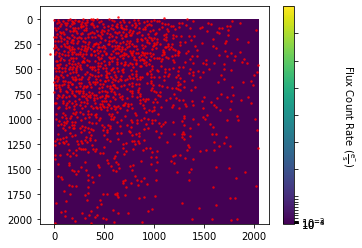

In [17]:
#fitsplot = plt.imshow(np.ma.masked_where(IMAGE_B.mask),
                      #norm=norm_image, cmap = cmap)
fitsplot = plt.imshow(dataB)

plt.scatter(sources_B['x_centroid'], sources_B['y_centroid'], s=10, marker='.',lw=1, alpha=0.7, color='r')
cbar = plt.colorbar(fitsplot, fraction=0.046, pad=0.04, ticks=LogLocator(subs=range(10)))
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
cbar.ax.set_yticklabels(labels)

cbar.set_label(r'Flux Count Rate ({})'.format(IMAGE_B.unit.to_string('latex')), 
               rotation=270, labelpad=30)




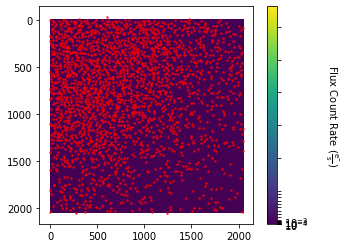

In [18]:
fitsplot = plt.imshow(dataV)


plt.scatter(sources_V['x_centroid'], sources_V['y_centroid'], s=10, marker='.',lw=1, alpha=0.7, color='r')

cbar = plt.colorbar(fitsplot, fraction=0.046, pad=0.04, ticks=LogLocator(subs=range(10)))
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
cbar.ax.set_yticklabels(labels)

cbar.set_label(r'Flux Count Rate ({})'.format(IMAGE_V.unit.to_string('latex')), 
               rotation=270, labelpad=30)




In [19]:
from photutils import CircularAperture

In [20]:
loc_B = np.array([sources_B['x_centroid'], sources_B['y_centroid']])
positions_B = np.transpose(loc_B)

In [21]:
position_B = (sources_B['x_centroid'], sources_B['y_centroid'])
radius = 10.
circular_aperture_B = CircularAperture(position_B, r=radius)

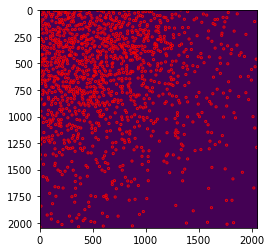

In [22]:
#fig, plt = plt.subplots(1, 1, figsize=(8, 8))
#plt.figure()
fitsplot = plt.imshow(dataB)
plt.imshow(dataB, cmap='viridis')
circular_aperture_B.plot(color='red', alpha=0.9)
#cbar = plt.colorbar(fitsplot, fraction=0.046, pad=0.04, ticks=LogLocator(subs=range(10)))
#circular_aperture_B.plot(color='red', lw=2.0, alpha=0.5)

In [23]:
from photutils import (aperture_photometry, source_properties, detect_sources)

In [24]:
flux_B = aperture_photometry(dataB, circular_aperture_B)
print(flux_B)

 id       xcenter             ycenter           aperture_sum   
            pix                 pix                            
---- ------------------ -------------------- ------------------
   1  83.37579421451554    15.23727926469112  7931.168420759434
   2 157.63418543198642  0.22497053948181142  13075.21571747257
   3  239.1595495797923    19.88487719719826  6457.833132187359
   4  331.1570927834447    8.488504867059502   4011.65854894893
   5  386.8545005698289  -2.5474072685073805  21231.27539702792
   6  546.5564548097819 -0.23408084370604362   1834.40688265061
   7  577.6917648945537   3.0141881249015903 3168.9191969358444
   8  1097.317855817088  -10.853612045354755                nan
   9 1328.2543369475543   -4.900448267939493  828.0928204876587
  10  180.1023469971686    17.79958280999237  55451.08184721609
 ...                ...                  ...                ...
1230  518.4487636313461   1994.9226278341753 13581.717939490427
1231  1581.326083523013   1995.500328341

In [25]:
threshold = 5. * stdb
npixels = 15
segm = detect_sources(IMAGE_B.data, threshold, npixels)
catalog = source_properties(IMAGE_B.data, segm)
table = catalog.to_table()

# Display the table
table

id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
int64,float64,float64,object,object,float32,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,258.7960280939422,231.074298551133,None,None,8643105.0,None,None,None,None,0.0,732.0,0.0,634.0,8.5459385,5773.5195,458.0,85.0,279.0,573.0,257003.0,286.01852331429996,44630.6528549192,175.8597689923606,157.5204905284583,-27.180704081882755,0.4446257024009008,0.10428353550662839,1.1164247165710106,29650.891807287997,-2484.430908193324,26088.471479084565,3.399707292247694e-05,6.47514967095097e-06,3.863942476649139e-05,0.5555763526441775
2,698.2622370659151,17.852815922363945,None,None,10556.047,None,None,None,None,674.0,724.0,0.0,45.0,8.546901,67.94219,691.0,23.0,697.0,28.0,765.0,15.604712843580296,371.43354954612926,15.230295243181947,8.01195577980281,59.86010540046743,0.8504512473210523,0.4739461283004692,1.900945993932682,106.48930019543549,72.85068820545904,189.66402841657077,0.012737706528470377,-0.009785204864679138,0.007151748624322325,0.23613429290056578
3,726.2413688885185,8.242812695630606,None,None,1762.8713,None,None,None,None,719.0,736.0,0.0,20.0,8.548848,19.515284,736.0,11.0,724.0,9.0,165.0,7.247146419131151,101.59797974644665,4.7437227238030655,4.100829120818523,-64.08697520920921,0.5026760249651963,0.13552512244415738,1.1567716147256146,17.902700574507755,-2.235031841720121,21.41700418397104,0.05659483311788781,0.011812226678275067,0.047308220266029634,0.10501709104874289
4,759.8449697931278,9.248374621633,None,None,833.2928,None,None,None,None,752.0,765.0,0.0,21.0,8.546366,15.618172,761.0,16.0,760.0,11.0,86.0,5.232078956954491,62.112698372208094,5.347182368258636,2.6721281245444373,-85.53140478558501,0.8661833168090166,0.5002736131824428,2.00109505197108,7.270491100072775,-1.6663086599548453,28.462136893324633,0.13941289786624608,0.01632378622129458,0.03561223238335356,0.06161803402864129
5,794.0886798073635,4.794065069282754,None,None,3225.3494,None,None,None,None,775.0,807.0,0.0,19.0,8.547115,65.312256,799.0,18.0,797.0,1.0,238.0,8.703892974511014,140.43250352560273,7.00725696372879,4.431311069449332,23.444746667541256,0.7746511221682445,0.3676111647700605,1.5813055896794816,44.437432500638685,10.755317951411937,24.300735449311123,0.025203383880943515,-0.022309646360824224,0.04608805656657035,0.24721271554093974
6,810.3546382089547,4.506605185296591,None,None,195.49371,None,None,None,None,808.0,815.0,0.0,7.0,8.563978,11.3039665,810.0,7.0,809.0,0.0,21.0,2.5854414729132054,19.65685424949238,2.8133567302129125,1.7227177113009624,46.15818638873199,0.7905981584883909,0.38766467373279445,1.6330921263288813,5.341389520779778,2.4715886687794693,5.541342883484537,0.23590501810382078,-0.2104400257891914,0.2273926407540322,0.037150324726313855
7,837.9874398616006,10.804396440079554,None,None,5842.6104,None,None,None,None,825.0,859.0,0.0,30.0,8.546025,56.16647,828.0,18.0,841.0,4.0,440.0,11.834540545406394,209.03048327204942,9.665126084750534,5.224042905404381,-54.49097175381649,0.8413412053230572,0.45949562793114684,1.8501237948776725,49.5985549664096,-31.26414374304487,71.10673154522144,0.02789216324688984,0.024527202477325493,0.019455415287273237,0.21435864656467724
8,871.2644486457738,1.5148304416516882,None,None,420.95383,None,None,None,None,865.0,880.0,0.0,5.0,8.579054,12.913037,870.0,4.0,867.0,1.0,42.0,3.65636639

In [ ]:
from photutils import CircularAnnulus

In [ ]:
annulus_apertures_B = CircularAnnulus(position_B, r_in=8., r_out=12.)
annulus_masks_B = annulus_apertures_B.to_mask(method='center')
mask = IMAGE_B.mask
data = dataB
BB_median = []
CircularAnn = []
for obj in catalog:
    position = (obj.xcentroid.value, obj.ycentroid.value)
    theta = obj.orientation.value
    CircularAnn.append(annulus_apertures_B)
CircularAnn = np.array(CircularAnn)

In [ ]:
#phot_datum = aperture_photometry(IMAGE_B.data, CircularAnn[0])
#phot_datum

In [ ]:
flux_B['annulus_median'] = CircularAnn
print(flux_B['annulus_median'])

In [ ]:
flux_B ['aper_BB'] = CircularAnn*circular_aperture_B.area
print(flux_B['aper_BB'])

flux_B['annulus_median'] = CircularAnn
print(flux_B['annulus_median'])

In [ ]:
from photutils import CircularAnnulus

annulus_apertures_B = CircularAnnulus(position_B, r_in=8., r_out=12.)
annulus_masks_B = annulus_apertures_B.to_mask(method='center')
mask = IMAGE_B.mask
data = dataB
BB_median = []
for mask in annulus_masks_B:
    
    annulus_data = mask.multiply(data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    BB_median.append(median_sigclip)
    
BB_median = np.array(BB_median)

In [ ]:
flux_B ['aper_BB'] = BB_median*circular_aperture_B.area
print(flux_B['aper_BB'])

In [ ]:
flux_B['final_phot'] = flux_B['aperture_sum'] - flux_B['aper_BB']
print(flux_B['final_phot'])